# **Recommendation System**

A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

# **Problem Statement**

Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales. This dataset is related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

***The dataset contain 4 attributes:***

***UserId***	: Every user identified with a unique id.

***ProductId*** : Every product identified with a unique id.

***Rating*** : Rating of the corresponding product by the corresponding user.

***Timestamp*** : Time of the rating.

**These are the Steps which I perform for this model.**

***Step 1*** : Download the dataset.

***Step 2*** : Import Required Library.

***Step 3*** : Load the dataset.

***Step 4*** : Drop the irrelevant column

***Step 5*** : Perform Data Visualization

***Step 6*** : Building Utility Matrix

***Step 7*** : Transposing the Matrix

***Step 8*** : Decomposing the Matrix

***Step 9*** : Generating a Correlation Matrix

***Step 10*** : Recommending a Highest Top Correlated Products

# **Step 1 : Download the dataset.**

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "garimasharma05"
os.environ['KAGGLE_KEY'] = 'b368874cc883aeb36a30c03c6822e469'

In [ ]:
!kaggle datasets download -d skillsmuggler/amazon-ratings

amazon-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/amazon-ratings.zip

Archive:  /content/amazon-ratings.zip
replace ratings_Beauty.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ratings_Beauty.csv      


# **Step 2 : Import Required Library.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **Step 3 : Load the dataset.**

pd.read_csv is used for read the comma-separated values(csv) into dataframe.

In [ ]:
df = pd.read_csv('/content/ratings_Beauty.csv')
df = df.dropna()
df.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


# **Step 4 : Drop the irrelevant column**

In the dataset, the Timestamp column is not useful for this model so drop the column.

In [ ]:
df.drop('Timestamp',axis = 1,inplace = True)

Using shape() keyword which is a tuple of array dimensions that tells the number of rows and columns of a given dataset.

In [ ]:
df.shape

(2023070, 3)

Using info() keyword which show the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [ ]:
df.describe()

,Rating
count,2.023070e+06
mean,4.149036e+00
std,1.311505e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Print the total rating, total unique users, total unique products.

In [ ]:
print('Total Rating : ',df.shape[0])
print('Total Unique Users : ',df['UserId'].unique().shape[0])
print('Total Unique Products : ',df['ProductId'].unique().shape[0])

Total Rating :  2023070
Total Unique Users :  1210271
Total Unique Products :  249274


# **Step 5 : Perform Data Visualization**

Show the products rating.

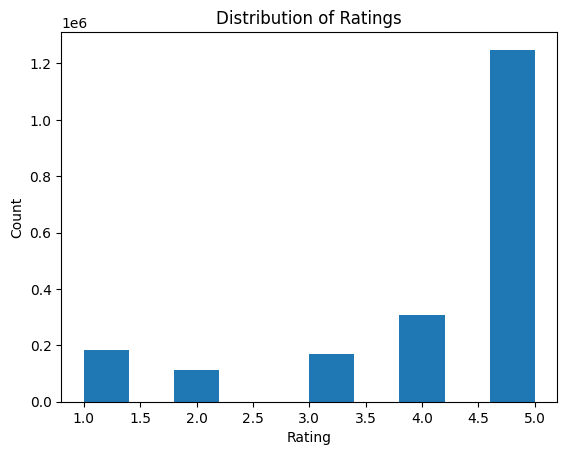

In [ ]:
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


From the above chart, we can clearly see that most of the users have given 5 rating.

** **

Group the ***'UserId'*** column and then consider the ***'Rating'*** column.

It counts the number of ratings made by each user.

In [ ]:
rated_products_per_user = pd.DataFrame(df.groupby(by = 'UserId')['Rating'].count().sort_values(ascending=False))
rated_products_per_user.head(10)

,Rating
UserId,
A3KEZLJ59C1JVH,389
A281NPSIMI1C2R,336
A3M174IC0VXOS2,326
A2V5R832QCSOMX,278
A3LJLRIZL38GG3,276
ALQGOMOY1F5X9,275
AKMEY1BSHSDG7,269
A3R9H6OKZHHRJD,259
A1M04H40ZVGWVG,249


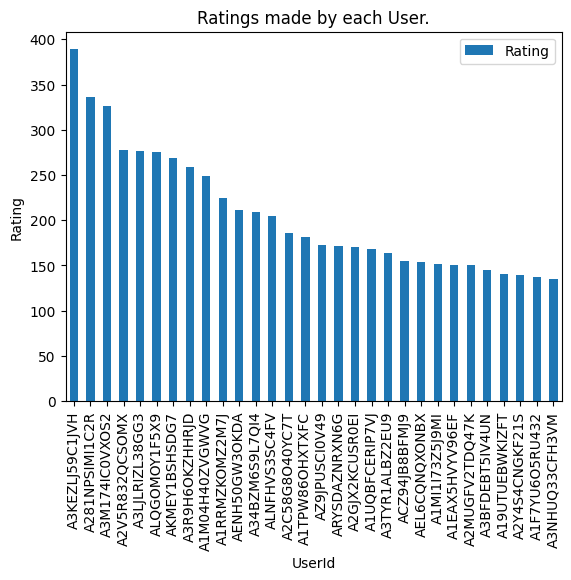

In [ ]:
rated_products_per_user.head(30).plot(kind = "bar")
plt.xlabel("UserId")
plt.ylabel("Rating")
plt.title('Ratings made by each User.')
plt.show()

***df.groupby('ProductId')***: This groups the DataFrame df by the 'ProductId' column, creating groups based on each unique 'ProductId'.

***.filter(lambda x: x['Rating'].count() >= 50)***: This uses the filter() function to apply a condition to each group. The condition specified here is a lambda function that checks the count of ratings within each 'ProductId' group. It keeps the groups (and their corresponding rows) where the count of ratings ('Rating' column) is 50 or more.

In [ ]:
data=df.groupby('ProductId').filter(lambda x:x['Rating'].count()>=50)

The resulting DataFrame data will contain rows only for those products ('ProductId') that have at least 50 ratings in the original dataset.

In [ ]:
data.head()

,UserId,ProductId,Rating
1705,A2SR9M2CWC2OCP,9790790961,4.0
1706,A3V1EVBYP0U77W,9790790961,2.0
1707,AVJKKAS4P52P9,9790790961,5.0
1708,A2NQQDBBGFW1OT,9790790961,5.0
1709,A1OFNEUHZ7BSCB,9790790961,5.0


Group the ***'ProductId'*** column and then consider the ***'Rating'*** column.

It counts the number of ratings made by each Product.

In [ ]:
rating_per_product=data.groupby('ProductId')['Rating'].count().sort_values(ascending=False)
rating_per_product.head(10)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589
Name: Rating, dtype: int64

Visualize the ***top 30 Products*** with the highest count of ***Ratings*** using a bar plot.

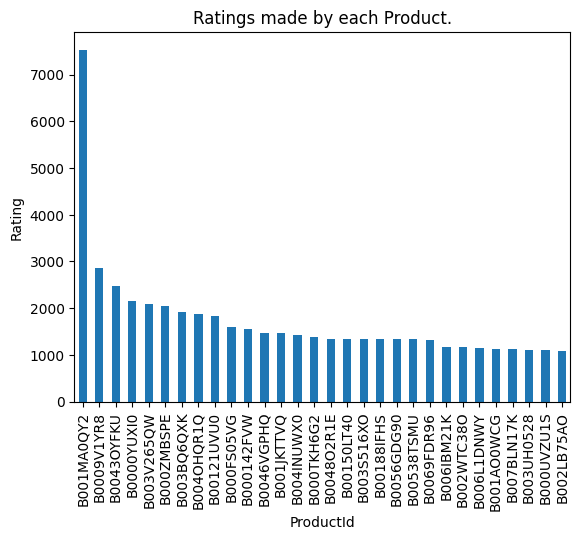

In [ ]:
rating_per_product.head(30).plot(kind = "bar")
plt.xlabel("ProductId")
plt.ylabel("Rating")
plt.title('Ratings made by each Product.')
plt.show()

Group the ***'ProductId'*** column and then consider the ***'Rating'*** column.

It calculate the *average* of the ratings for each Product.

In [ ]:
mean_rating_product_count=pd.DataFrame(data.groupby('ProductId')['Rating'].mean())
mean_rating_product_count.head(10)

,Rating
ProductId,
9790790961,4.271429
9790799829,2.640000
B00004TMFE,3.445255
B00004TUBL,4.634409
B00004TUBV,4.269006
B00004U9UY,4.726027
B00004U9V2,4.760870
B000050B6U,4.175066
B000050B75,3.566667


Visualize the distribution of average ratings for products.

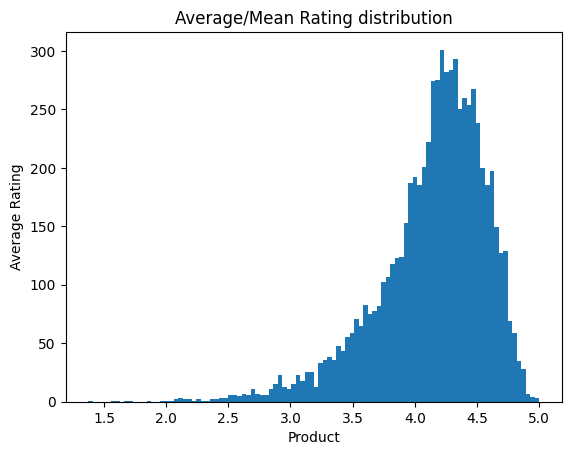

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['Rating'],bins=100)
plt.xlabel("Product")
plt.ylabel("Average Rating")
plt.title('Average/Mean Rating distribution')
plt.show()

# ***Step 6*** : Building Utility Matrix

 In this section, we will call a function named pivot table. This function is aimed to cross tabulate each user against each place, and output a matrix.

 It rearranges the sampled data to create a matrix where rows represent users ('UserId'), columns represent products ('ProductId'), and the cell values represent ratings given by users to products. The fill_value=0 parameter fills any missing values (if present) with zeros.

This type of matrix representation is common in recommendation systems and collaborative filtering techniques.

In [ ]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_matrix.head()

ProductId,9790790961,9790799829,B00004TMFE,B00004TUBL,B00004TUBV,B00004U9UY,B00004U9V2,B000050B6U,B000050B75,B000050FET,...,B00KCTER3U,B00KGDRCZW,B00KH6F6TM,B00KHGIK54,B00KHH2VOY,B00KQBR9FM,B00KQVTX06,B00KWE08Q0,B00KWFDBKE,B00L5JHZJO
UserId,,,,,,,,,,,,,,,,,,,,,
A00262022JQPXX5SXEVJR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A010407538LRAQYK3G2RZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01093952TSHPIG9VULPS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01198201H0E3GHV2Z17I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01220933UY4PQK26SHOR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check the shape of the utility matrix.

In [ ]:
ratings_matrix.shape

(19584, 5900)

# ***Step 7*** : Transposing the Matrix.

Transposing a matrix swaps its rows and columns, effectively flipping it across its diagonal.

In the context of recommendation systems or collaborative filtering, transposing the matrix might be done for various reasons, such as changing the orientation of user-item relationships for analysis or algorithm implementation.

In [ ]:
x_rating_matrix = ratings_matrix.T
x_rating_matrix.head()

UserId,A00262022JQPXX5SXEVJR,A010407538LRAQYK3G2RZ,A01093952TSHPIG9VULPS,A01198201H0E3GHV2Z17I,A01220933UY4PQK26SHOR,A0171438140M13IHT8N6X,A02278831YTIM059V25A7,A023535518XEETBJH6M1H,A02358132V682LD36IOLX,A02732722N0H3B6J9VVXW,...,AZX0XHSOODF0D,AZXKAH2DE6C8A,AZY8RW6L7W52Z,AZYE71TQOZJFY,AZYLV04HSRQQ8,AZYQ5KHMPV2ST,AZYV6J88DT5CZ,AZZCUK9YE3X16,AZZG89EM33FDR,AZZSAMMJPJKJ1
ProductId,,,,,,,,,,,,,,,,,,,,,
9790790961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9790799829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00004TMFE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00004TUBL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00004TUBV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check the shape after transpose the matrix.

In [ ]:
x_rating_matrix.shape

(5900, 19584)

# ***Step 8*** : Decomposing the Matrix

Import Library for decomposing the matrix.

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
X = x_rating_matrix

Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V. This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix.

In [ ]:
SVD = TruncatedSVD(n_components = 10)
decomposed_matrix =SVD.fit_transform(X)
decomposed_matrix.shape

(5900, 10)

In [ ]:
print(decomposed_matrix)

[[ 1.30066781e-20  4.68631004e-19 -5.15410157e-18 ...  6.84001432e-17
   8.94682665e-18  4.52432055e-17]
 [ 1.26141386e-12 -5.66405665e-10  6.95612747e-10 ...  1.24187121e-09
   8.61092832e-09 -1.40696795e-08]
 [ 3.72806795e-16  6.97951631e-14  9.39141190e-14 ... -1.19310504e-13
   7.61252302e-13  1.13290071e-14]
 ...
 [-1.78042591e-12  8.01822048e-10  1.46003472e-09 ... -1.49832901e-08
  -2.14321790e-09 -3.28569629e-09]
 [ 2.95988378e-07 -6.93136620e-05 -3.09347285e-05 ... -8.58522467e-05
   8.13767338e-04 -1.02000788e-03]
 [ 3.29171690e-06  1.83357754e-03  1.74877974e-03 ...  9.93410893e-03
  -9.36339418e-03 -3.35093014e-02]]


# ***Step 9*** : Generating a Correlation Matrix

The output of corr_matrix.shape will show the dimensions of the correlation matrix. If decomposed_matrix had a shape of (5900, 10), the resulting corr_matrix would likely have a shape of (5900, 5900) since corrcoef computes the correlation coefficients among the rows (or columns) of the input matrix, resulting in a square matrix where each row and column correspond to a data point or component in the input matrix.

In [ ]:
corr_matrix = np.corrcoef(decomposed_matrix)
corr_matrix.shape

(5900, 5900)

In [ ]:
X.index[9]

'B000050FET'

In [ ]:
i = "B000052WY7"
product_name = list(X.index)
product_id=product_name.index(i)
print("Product Id",product_id)

Product Id 11


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
corr_prod_id = corr_matrix[product_id]
corr_prod_id.shape

(5900,)

The code corr_matrix[corr_prod_id > 0.80].shape suggests that we filtering the correlation matrix (corr_matrix) based on a condition where the values in the corr_prod_id subset are greater than 0.80.

In [ ]:
corr_matrix[corr_prod_id>0.80].shape

(121, 5900)

# ***Step 10*** : Recommending a Highest Top Correlated Products

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(X.index[corr_prod_id > 0.80])
recommend[:20]

['B000052WYD',
 'B00012NI7E',
 'B00013TQRE',
 'B0001TQ9WI',
 'B00027DMLK',
 'B0002DUSUW',
 'B0002JGIZA',
 'B0002Z8SE8',
 'B0006IHDQ0',
 'B0006ZWUIE',
 'B0007V6PFQ',
 'B000BR50M0',
 'B000C1UF3Y',
 'B000C21A7I',
 'B000C234DQ',
 'B000GA7214',
 'B000GHVJWA',
 'B000GX4BSS',
 'B000ICR9UO',
 'B000JL5V0E']